## Observations and Insights 

In [ ]:
# Three observations that can be inferred from this data:
#     1. Capomulin appears to be an effective treatment by how much the tumor volume decreased over the timepoint.
#     2. As time went on with treatment, it appears that mice weight had decreased.
#     3. There is a small positive correlation with tumor volume and weight of mice.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# mouse_metadata.count()
# study_results.count()
# Combine the data into a single dataset
mergeDF = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mergeDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
uniqueMice = len(mergeDF["Mouse ID"].unique())
uniqueMice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateMice = mergeDF.loc[mergeDF.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"]
duplicateMice.unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

mouseG989DF = mergeDF.loc[mergeDF["Mouse ID"]=="g989"]
mouseG989DF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = mergeDF[mergeDF["Mouse ID"]!= "g989"]
cleanDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
numberMice = len(cleanDF["Mouse ID"].unique())
numberMice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupRegimen = cleanDF.groupby("Drug Regimen")
# groupRegimen.head()

#mean
meanRegimen = round(groupRegimen["Tumor Volume (mm3)"].mean(), 2)
# meanRegimen

#median
medianRegimen = round(groupRegimen["Tumor Volume (mm3)"].median(), 2)
# medianRegimen

varianceRegimen = round(groupRegimen["Tumor Volume (mm3)"].var(), 2)
# varianceRegimen

stdvRegimen = round(groupRegimen["Tumor Volume (mm3)"].std(), 2)
# stdvRegimen

semRegimen = round(groupRegimen["Tumor Volume (mm3)"].sem(), 2)
# semRegimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimenDF = pd.DataFrame({"Tumor Volume Mean":meanRegimen, "Tumor Volume Median":medianRegimen, "Tumor Volume Variance":varianceRegimen,
                         "Tumor Volume Standard Deviation":stdvRegimen, "Tumor Volume SEM":semRegimen})
regimenDF

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregimenMean = regimenDF.agg("mean", axis="columns")
# aggregimenMean
aggregimenMedian = regimenDF.agg("median", axis="columns")
# aggregimenMedian
aggregimenVariance = regimenDF.agg("var", axis="columns")
# aggregimenVariance
aggregimenStdDev = regimenDF.agg("std", axis="columns")
# aggregimenStdDev
aggregimenSem = regimenDF.agg("sem", axis="columns")
# aggregimenSem
aggregimenDF = pd.DataFrame({"Tumor Volume Mean": aggregimenMean, "Tumor Volume Median": aggregimenMedian, "Tumor Volume Variance": aggregimenVariance,
                         "Tumor Volume Standard Deviation": aggregimenStdDev, "Tumor Volume SEM": aggregimenSem})
aggregimenDF

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,22.502,24.95,374.47687,19.351405,8.654211
Ceftamin,30.080,39.29,626.52060,25.030394,11.193932
Infubinol,30.978,43.13,646.75657,25.431409,11.373272
Ketapril,37.274,53.70,939.10328,30.644792,13.704768
Naftisol,36.348,52.51,887.02232,29.782920,13.319327
Placebo,35.178,52.29,817.32107,28.588828,12.785312
Propriva,30.756,43.85,629.96643,25.099132,11.224673
Ramicane,21.910,23.49,361.71545,19.018818,8.505474
Stelasyn,34.878,52.43,800.37372,28.290877,12.652065


## Bar and Pie Charts

In [9]:
cleanDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
dropDupMiceReg = cleanDF.loc[:,["Mouse ID","Drug Regimen"]].drop_duplicates()
# dropDupMice.count()

miceRegimen = dropDupMiceReg["Drug Regimen"].value_counts()
miceRegimen

Ceftamin     25
Infubinol    25
Ketapril     25
Ramicane     25
Zoniferol    25
Placebo      25
Naftisol     25
Capomulin    25
Propriva     24
Stelasyn     24
Name: Drug Regimen, dtype: int64

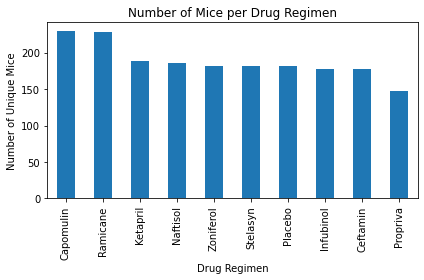

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

counts = cleanDF["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")
plt.tight_layout()
plt.show()


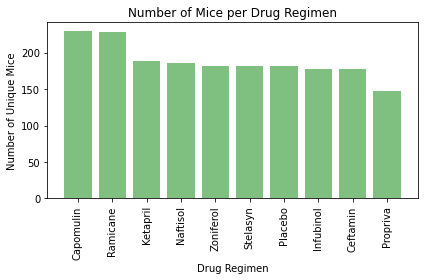

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


plt.bar(counts.index.values, counts.values, color="green", alpha=0.5, align="center")
plt.xticks(rotation="vertical")
# ytick_locations = [value for value in y_axis]
# plt.yticks(ytick_locations, cleanDF["Mouse ID"], rotation="horizontal")
# plt.xlim(-0.25, len(x_axis))
# plt.ylim(0, max(cleanDF["Mouse ID"])+100)
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")
plt.tight_layout()
plt.show()

In [13]:
cleanDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
dropDupMice = cleanDF.loc[:,["Mouse ID","Sex"]].drop_duplicates()
# dropDupMice.count()

miceGenders = dropDupMice["Sex"].value_counts()
miceGenders

Male      125
Female    123
Name: Sex, dtype: int64

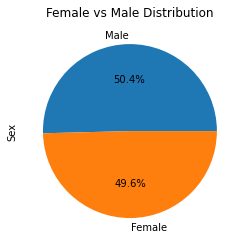

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
miceGenders.plot(kind="pie", autopct="%1.1f%%")
colors = ["lightskyblue", "lightcoral"]
plt.title("Female vs Male Distribution")

plt.show()

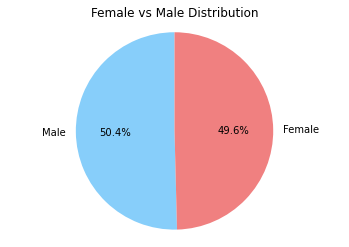

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male","Female"]
# labels
sizes = [125, 123]
# sizes
colors = ["lightskyblue", "lightcoral"]
plt.title("Female vs Male Distribution")
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
cleanDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse

maxTimepoint = cleanDF.groupby("Mouse ID")["Timepoint"].max()
maxTimepoint = maxTimepoint.reset_index()
# maxTimepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

maxDF = maxTimepoint.merge(cleanDF, on=["Mouse ID", "Timepoint"], how="left")
maxDF


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [19]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumorVolData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVol = maxDF.loc[maxDF["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
#     print(tumorVol)
    
    
    # add subset 
    tumorVolData.append(tumorVol)
    
    
    
    # Determine outliers using upper and lower bounds
    

tumorVols = maxDF["Tumor Volume (mm3)"]
quartiles = tumorVols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
# print(tumorVolData)

The lower quartile of temperatures is: 45.87586684749999
The upper quartile of temperatures is: 65.05362410500001
The interquartile range of temperatures is: 19.17775725750002
The the median of temperatures is: 55.793278175 
Values below 17.109230961249963 could be outliers.
Values above 93.82025999125004 could be outliers.


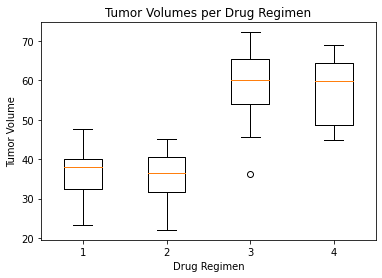

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes per Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumorVolData)
plt.show()
  


## Line and Scatter Plots

In [21]:
cleanDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


<function matplotlib.pyplot.show(*args, **kw)>

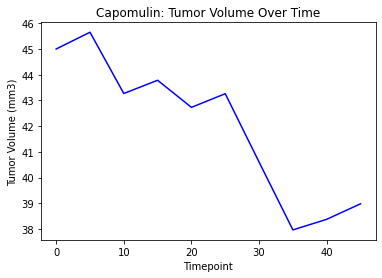

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# b128

mouseb128 =cleanDF[(cleanDF['Mouse ID'] == 'b128')]
# mouseb128
x_axis = mouseb128["Timepoint"]
y_axis = mouseb128["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, color="blue", label="mouse b128")

plt.title("Capomulin: Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show

In [23]:
cleanDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


<function matplotlib.pyplot.show(*args, **kw)>

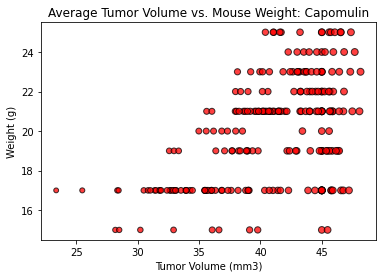

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin = cleanDF[(cleanDF['Drug Regimen'] == 'Capomulin')]
capomulin
x_axis = capomulin["Tumor Volume (mm3)"]
y_axis = capomulin["Weight (g)"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)
plt.title("Average Tumor Volume vs. Mouse Weight: Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show

## Correlation and Regression

The r-squared is: 0.2763600223455914


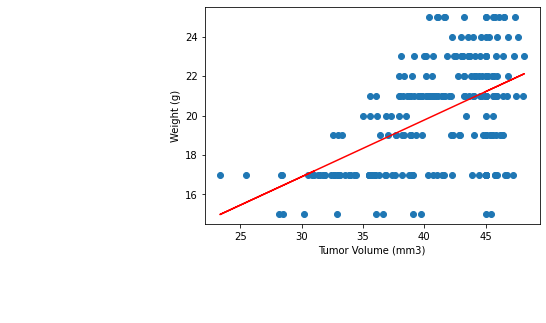

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin["Tumor Volume (mm3)"]
y_values = capomulin["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
print(f"The r-squared is: {rvalue**2}")
plt.show()